# PROBLEM:
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
data set can downold click by this link: 

https://www.kaggle.com/team-ai/spam-text-message-classification



## **Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import string 
import re
import warnings
import nltk
import numpy as np
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Read the dataset
url='spam.csv'
df=pd.read_csv(url,encoding='latin-1')

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#change the column name
df = df.rename(columns={"Category":"label", "Message":"text"})

In [ ]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Conver catogorical variables to Dummy Variables
for i in df.index:
  if df['label'][i]=="ham":
    df['label'][i]=1
  else:
    df['label'][i]=0

In [ ]:
df.head()

,label,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.describe()

,label,text
count,5572,5572
unique,2,5157
top,1,"Sorry, I'll call later"
freq,4825,30


Here, we can use in the mail "Sorry, I'll call later" to appear more time than in other sentences.

In [ ]:
#dropping duplicate rows
df=df.drop_duplicates()


#### **Find length of each sentences**

In [ ]:
df['word_length'] = df['text'].apply(lambda x:len(x.split()))

In [ ]:
df.head()

,label,text,word_length
0,1,"Go until jurong point, crazy.. Available only ...",20
1,1,Ok lar... Joking wif u oni...,6
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,1,U dun say so early hor... U c already then say...,11
4,1,"Nah I don't think he goes to usf, he lives aro...",13


### **Data Preprocessing**

In [ ]:
message=df.copy()
message.reset_index(inplace=False)

,index,label,text,word_length
0,0,1,"Go until jurong point, crazy.. Available only ...",20
1,1,1,Ok lar... Joking wif u oni...,6
2,2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,3,1,U dun say so early hor... U c already then say...,11
4,4,1,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...,...
5152,5567,0,This is the 2nd time we have tried 2 contact u...,30
5153,5568,1,Will Ã¼ b going to esplanade fr home?,8
5154,5569,1,"Pity, * was in mood for that. So...any other s...",10
5155,5570,1,The guy did some bitching but I acted like i'd...,26


In [ ]:
#Remove puncuation, newlines and multiple whitespace, lower case everything etc..
ps=PorterStemmer()
df['cleaned_text']=""
corpus=[]
for i in df.index:
  #1.remove except a to z and A to Z 
  review=re.sub('[^a-zA-Z]',' ',df['text'][i])
  #2.Remove all puncuation
  review = re.sub('[\(].*?[\)]', '', review)
  # 2. remove newlines and multiple whitespace, lower case everything
  review = re.sub('\s+', ' ', review)
# 4. remove special characters
  # Regex to keep . , and ' is [^A-Za-z0-9.,\' ]
  review = re.sub('[^A-Za-z0-9 ]', '', review)
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)
  #df['cleaned_text']=np.array(corpus)


In [ ]:
print(corpus[:100])

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'gonna home soon want talk stuff anymor tonight k cri enough today', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'search right word thank breather promis wont 

In [ ]:
#Convert corpus to array
import numpy as np
df['cleaned_text']=np.array(corpus)

In [ ]:
df.head()

,label,text,word_length,cleaned_text
0,1,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,6,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkt st m...
3,1,U dun say so early hor... U c already then say...,11,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",13,nah think goe usf live around though


### **Cleaned Spam message Analysis**

In [ ]:
## Seperate Spam message
spam=list(df[df['label']==0]['cleaned_text'])
#print(Data.Frame(spam))

In [ ]:
## Seperate Spam message
ham=list(df[df['label']==1]['cleaned_text'])
#print(Data.Frame(spam))

# **Tokenization for spam message**

In [ ]:
#Spam mail words
from nltk.tokenize import word_tokenize
all_word_spam=[]
for sentence in spam:
    words=word_tokenize(sentence)
    for word in words:
        all_word_spam.append(word)

### **Tokenization for spam mail**

In [1]:
#Ham mail words
from nltk.tokenize import word_tokenize
all_word_ham=[]
for sentence in ham:
    words=word_tokenize(sentence)
    for word in words:
        all_word_ham.append(word)

KeyboardInterrupt: ignored

### **Most Common Words In coprus(All Mails)**

In [ ]:
from nltk.tokenize import word_tokenize
all_word=[]
for sentence in corpus:
    words=word_tokenize(sentence)
    for word in words:
        all_word.append(word)

### **Model for classification** 

In [ ]:
from sklearn import model_selection
#splitting the data (80:20 ratio)
x_train,x_test,y_train,y_test=model_selection.train_test_split(df['cleaned_text'],df['label'].astype(int),test_size=0.2,stratify=df['label'],random_state=100)
print("Training data set independent features contain " + " " + str(len(x_train))+ " "+ "Observation")
print("Testing data set contain  " + " " + str(len(y_test))+ " "+ "Observation")

Training data set independent features contain  4125 Observation
Testing data set contain   1032 Observation


### **Spam classification with lstm and word2vec**

In [ ]:
#The tokenizer Class to convert the sentences into word vectors
from keras.preprocessing.text import Tokenizer
num_words = 12000 # this means 12000 unique words can be taken 
tokenizer=Tokenizer(num_words,lower=True)
df_total = df['cleaned_text']
#pd.concat([x_train, x_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
#Find the tokenizer word_index
len(tokenizer.word_index)

6314

Where we have taken 12000 words but we have only 6239 and the rest will be zero

In [ ]:
df['word_length'].max()

171

### Pad_sequences PreProcessing


In [ ]:
from keras.preprocessing.sequence import pad_sequences

x_train_    =tokenizer.texts_to_sequences(x_train)
x_train_pad =pad_sequences(x_train_,maxlen=171,padding='post')
x_test_     = tokenizer.texts_to_sequences(x_test)
x_test_pad  = pad_sequences(x_test_, maxlen = 171, padding = 'post')

In [ ]:
#Find the shape of test data and train_pad data
print(x_train_pad.shape,x_test_pad.shape)

(4125, 171) (1032, 171)


In [ ]:
#Import Tensorflow important libraries
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.keras.layers import Dropout

In [ ]:
LENGTH = x_train_pad.shape[1]

In [ ]:
EMBEDDING_DIM = 16
model = Sequential()
model.add(Embedding(input_dim = num_words, 
                          output_dim = EMBEDDING_DIM, 
                          input_length= LENGTH
                          ))
model.add(Bidirectional(LSTM(36, activation='elu', return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, activation='elu')))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [ ]:
#EarlyStopping and ModelCheckpoint

from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
history_embedding = model.fit(x_train_pad,y_train, epochs = 35, batch_size = 120,
                            validation_data=(x_test_pad,y_test.to_numpy().astype(int)),verbose = 1, callbacks= [es, mc])

Epoch 1/35
35/35 [==============================] - ETA: 0s - loss: 0.4223 - accuracy: 0.8754
Epoch 1: val_accuracy improved from -inf to 0.87597, saving model to ./model.h5
35/35 [==============================] - 22s 517ms/step - loss: 0.4223 - accuracy: 0.8754 - val_loss: 0.2672 - val_accuracy: 0.8760
Epoch 2/35
35/35 [==============================] - ETA: 0s - loss: 0.6290 - accuracy: 0.8727
Epoch 2: val_accuracy did not improve from 0.87597
35/35 [==============================] - 17s 498ms/step - loss: 0.6290 - accuracy: 0.8727 - val_loss: 0.2819 - val_accuracy: 0.8760
Epoch 3/35
35/35 [==============================] - ETA: 0s - loss: 0.2426 - accuracy: 0.8759
Epoch 3: val_accuracy did not improve from 0.87597
35/35 [==============================] - 17s 500ms/step - loss: 0.2426 - accuracy: 0.8759 - val_loss: 0.2251 - val_accuracy: 0.8760
Epoch 4/35
35/35 [==============================] - ETA: 0s - loss: 0.1728 - accuracy: 0.9190
Epoch 4: val_accuracy improved from 0.87597 to

### **Plot Training Acuuracy vs Test Accuracy**

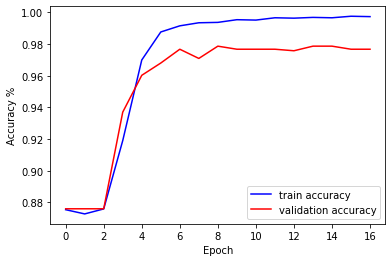

In [ ]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.legend(loc='lower right')
plt.show()

### Predict the Test data set classification

In [ ]:
y_pred = np.where(model.predict(x_test_pad)>.5,1,0)

In [ ]:
model.evaluate(x_test_pad, y_test)


33/33 [==============================] - 5s 104ms/step - loss: 0.0852 - accuracy: 0.9767


[0.08520874381065369, 0.9767441749572754]

In [ ]:
model.save('spam_messages.h5')